In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import plotly
import plotly.tools as tls
from IPython.core.display import display, HTML
from utils import findInsertionStartStop
display(HTML("<style>.container { width:100% !important; }</style>"))

%matplotlib notebook

In [30]:
logFile = r"\\10.128.50.43\sd6.3\1033388795_509652_20200630\1033388795_509652_20200630.motor-locs.csv"
saveDir = os.path.dirname(logFile)
print('Saving output to: {}'.format(saveDir))

Saving output to: \\10.128.50.43\sd6.3\1033388795_509652_20200630


In [3]:
#attempt to infer the date from the logFile
infer_date = True

if infer_date:
    try:
        inferred_date = os.path.basename(logFile).split('_')[-1].split('.')[0]
        dateOfInterest = inferred_date[:4] + '-' + inferred_date[4:6] + '-' + inferred_date[6:]
    #if that doesn't work, just manually enter the date you want (YYYY-MM-DD)
    except Exception as e: 
        print('failed to infer date, please set date manually')
else:
    dateOfInterest = '2020-06-30'

print(dateOfInterest)

startTime = '0:00' #when experiment started (24 hr clock H:MM), set this so that the insertion you're interested in is the first one after this time

2020-06-30


In [9]:
#read csv file into pandas dataframe
fulldf = pd.read_csv(logFile, header=None, names=['time', 'serialNum', 'x', 'y', 'z', 'relx', 'rely', 'relz'])
fulldf['time'] = pd.to_datetime(fulldf['time'])
fulldf = fulldf.set_index('time')

#limit to the day and time of interest
pdf = fulldf.loc[dateOfInterest]
datetimeinput = dateOfInterest.split('-')
datetimeinput.extend(startTime.split(':'))
startdatetime = pd.datetime(*[int(d) for d in datetimeinput])
pdf = pdf.loc[(pdf.index>=startdatetime)]

c:\mcpython3\envs\newscale\lib\site-packages\ipykernel_launcher.py:10: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.



In [11]:
# Get the newscale serial numbers in this log file
serial_numbers = pdf['serialNum'].unique()

# Known serial number to probe mappings for NP rigs
NP0_serialToProbeDict = {' SN32148': 'A', ' SN32142': 'B', ' SN32144':'C', ' SN32149':'D', ' SN32135':'E', ' SN24273':'F'}
NP1_serialToProbeDict = {' SN34027': 'A', ' SN31056': 'B', ' SN32141':'C', ' SN32146':'D', ' SN32139':'E', ' SN32145':'F'}
NP3_serialToProbeDict = {' SN31212': 'A', ' SN34029': 'B', ' SN31058':'C', ' SN24272':'D', ' SN32152':'E', ' SN36800':'F'}

known_serial_to_probe_mapping = {}
[known_serial_to_probe_mapping.update(d) for d in [NP0_serialToProbeDict, NP1_serialToProbeDict, NP3_serialToProbeDict]]

# Grab the probe mapping for all known serial numbers and leave unknown serial numbers unmapped
try:
    assert(all([s in known_serial_to_probe_mapping for s in serial_numbers]))
except Exception as e:
    unknown = []
    for s in serial_numbers:
        if s not in known_serial_to_probe_mapping:
            unknown.append(s)
            known_serial_to_probe_mapping[s] = ''
    warning_string = ('WARNING: Unknown newscale serial numbers {} encountered, '
                    'please update serial number dictionary'.format(unknown))
    print(warning_string)
finally:
    serialToProbeDict = {s:known_serial_to_probe_mapping[s] for s in serial_numbers}
    serialToProbeDict = {k: v for k, v in sorted(serialToProbeDict.items(), key=lambda item: item[1])}

print('Using following mapping between serial numbers and probe IDs: {}'.format(serialToProbeDict))

Using following mapping between serial numbers and probe IDs: {' SN32148': 'A', ' SN32142': 'B', ' SN32144': 'C', ' SN32149': 'D', ' SN32135': 'E', ' SN24273': 'F'}


c:\mcpython3\envs\newscale\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<IPython.core.display.Javascript object>


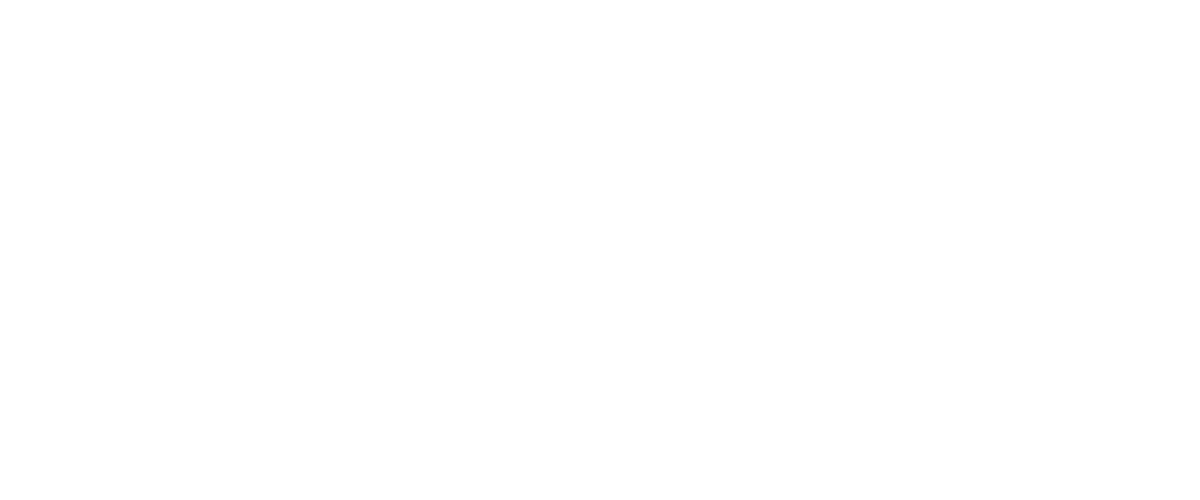

0 days 00:17:19.438000


c:\mcpython3\envs\newscale\lib\site-packages\plotly\matplotlylib\mpltools.py:368: MatplotlibDeprecationWarning:


The is_frame_like function was deprecated in Matplotlib 3.1 and will be removed in 3.3.

c:\mcpython3\envs\newscale\lib\site-packages\plotly\matplotlylib\renderer.py:410: UserWarning:

Bummer! Plotly can currently only draw Line2D objects from matplotlib that are in 'data' coordinates!

c:\mcpython3\envs\newscale\lib\site-packages\plotly\matplotlylib\renderer.py:512: UserWarning:

I found a path object that I don't think is part of a bar chart. Ignoring.



 SN32148: A
Insertion start time: 2020-06-30 15:25:11.984000
Insertion end time: 2020-06-30 15:42:31.422000
Insertion start coords: 
relx    3551.5
rely      2888
relz      2706
Name: 2020-06-30 15:25:11.984000, dtype: object
Insertion end coords: 
relx    3551.5
rely    2887.5
relz      6000
Name: 2020-06-30 15:42:31.422000, dtype: object


c:\mcpython3\envs\newscale\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<IPython.core.display.Javascript object>


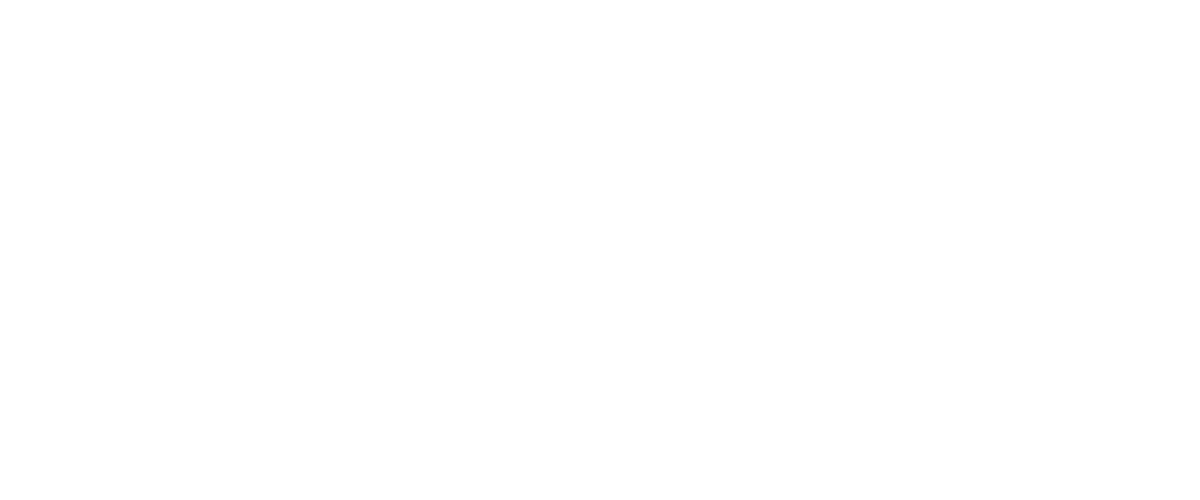

0 days 00:11:47.299000


c:\mcpython3\envs\newscale\lib\site-packages\plotly\matplotlylib\mpltools.py:368: MatplotlibDeprecationWarning:


The is_frame_like function was deprecated in Matplotlib 3.1 and will be removed in 3.3.

c:\mcpython3\envs\newscale\lib\site-packages\plotly\matplotlylib\renderer.py:410: UserWarning:

Bummer! Plotly can currently only draw Line2D objects from matplotlib that are in 'data' coordinates!

c:\mcpython3\envs\newscale\lib\site-packages\plotly\matplotlylib\renderer.py:512: UserWarning:

I found a path object that I don't think is part of a bar chart. Ignoring.



 SN32142: B
Insertion start time: 2020-06-30 15:25:12.332000
Insertion end time: 2020-06-30 15:36:59.631000
Insertion start coords: 
relx    4813.5
rely      2147
relz    3740.5
Name: 2020-06-30 15:25:12.332000, dtype: object
Insertion end coords: 
relx    4813.5
rely      2147
relz    5999.5
Name: 2020-06-30 15:36:59.631000, dtype: object


c:\mcpython3\envs\newscale\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<IPython.core.display.Javascript object>


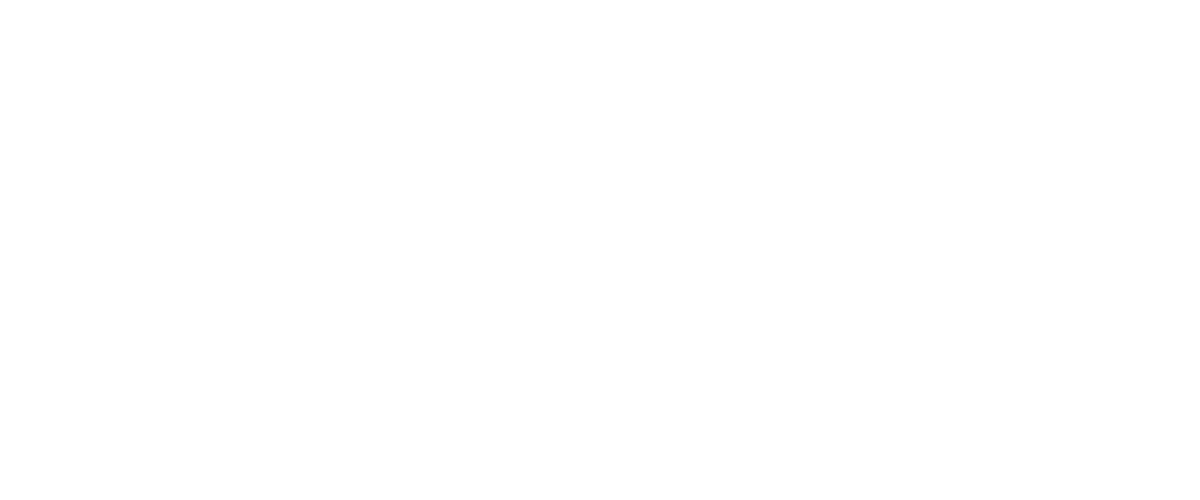

0 days 00:12:43.742000


c:\mcpython3\envs\newscale\lib\site-packages\plotly\matplotlylib\mpltools.py:368: MatplotlibDeprecationWarning:


The is_frame_like function was deprecated in Matplotlib 3.1 and will be removed in 3.3.

c:\mcpython3\envs\newscale\lib\site-packages\plotly\matplotlylib\renderer.py:410: UserWarning:

Bummer! Plotly can currently only draw Line2D objects from matplotlib that are in 'data' coordinates!

c:\mcpython3\envs\newscale\lib\site-packages\plotly\matplotlylib\renderer.py:512: UserWarning:

I found a path object that I don't think is part of a bar chart. Ignoring.



 SN32144: C
Insertion start time: 2020-06-30 15:25:12.525000
Insertion end time: 2020-06-30 15:37:56.267000
Insertion start coords: 
relx      1774
rely      1937
relz    3526.5
Name: 2020-06-30 15:25:12.525000, dtype: object
Insertion end coords: 
relx    1774.5
rely      1937
relz    5999.5
Name: 2020-06-30 15:37:56.267000, dtype: object


c:\mcpython3\envs\newscale\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<IPython.core.display.Javascript object>


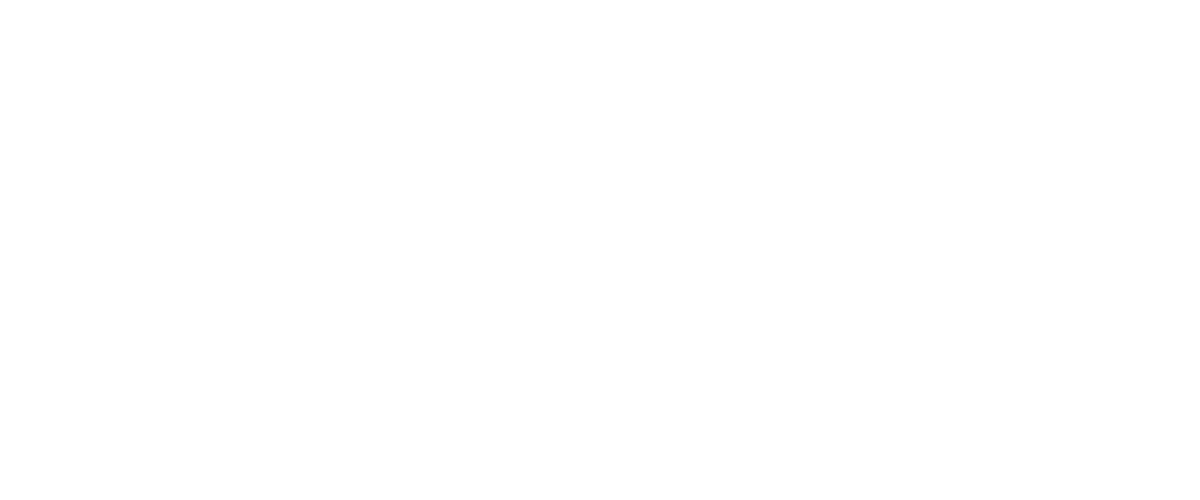

0 days 00:14:53.118000


c:\mcpython3\envs\newscale\lib\site-packages\plotly\matplotlylib\mpltools.py:368: MatplotlibDeprecationWarning:


The is_frame_like function was deprecated in Matplotlib 3.1 and will be removed in 3.3.

c:\mcpython3\envs\newscale\lib\site-packages\plotly\matplotlylib\renderer.py:410: UserWarning:

Bummer! Plotly can currently only draw Line2D objects from matplotlib that are in 'data' coordinates!

c:\mcpython3\envs\newscale\lib\site-packages\plotly\matplotlylib\renderer.py:512: UserWarning:

I found a path object that I don't think is part of a bar chart. Ignoring.



 SN32149: D
Insertion start time: 2020-06-30 15:25:14.164000
Insertion end time: 2020-06-30 15:40:07.282000
Insertion start coords: 
relx    4228
rely     119
relz    3159
Name: 2020-06-30 15:25:14.164000, dtype: object
Insertion end coords: 
relx    4228.5
rely     118.5
relz    5999.5
Name: 2020-06-30 15:40:07.282000, dtype: object


c:\mcpython3\envs\newscale\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<IPython.core.display.Javascript object>


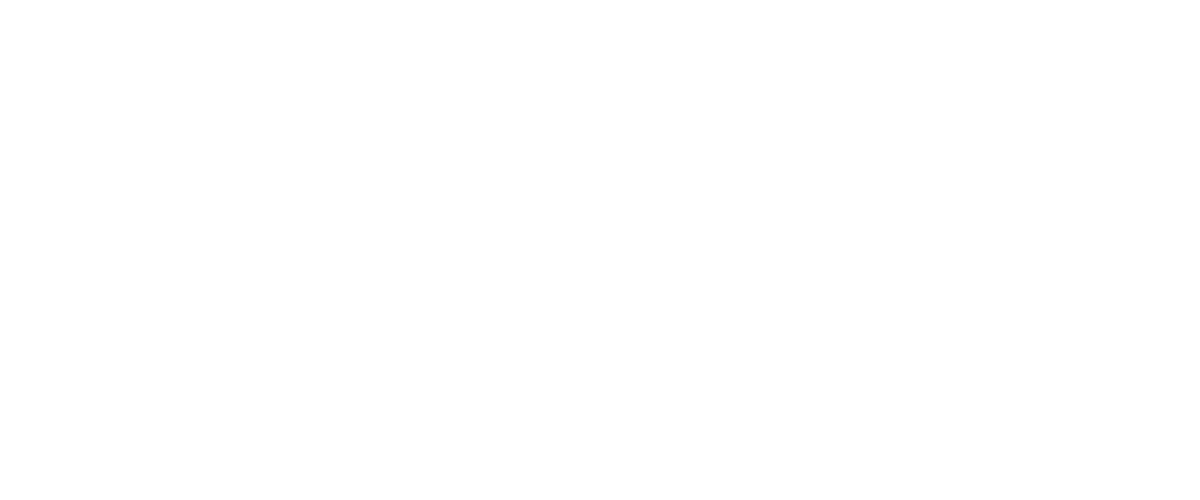

0 days 00:17:58.739000


c:\mcpython3\envs\newscale\lib\site-packages\plotly\matplotlylib\mpltools.py:368: MatplotlibDeprecationWarning:


The is_frame_like function was deprecated in Matplotlib 3.1 and will be removed in 3.3.

c:\mcpython3\envs\newscale\lib\site-packages\plotly\matplotlylib\renderer.py:410: UserWarning:

Bummer! Plotly can currently only draw Line2D objects from matplotlib that are in 'data' coordinates!

c:\mcpython3\envs\newscale\lib\site-packages\plotly\matplotlylib\renderer.py:512: UserWarning:

I found a path object that I don't think is part of a bar chart. Ignoring.



 SN32135: E
Insertion start time: 2020-06-30 15:25:14.401000
Insertion end time: 2020-06-30 15:43:13.140000
Insertion start coords: 
relx    3113.5
rely    2890.5
relz    2559.5
Name: 2020-06-30 15:25:14.401000, dtype: object
Insertion end coords: 
relx    3113.5
rely      2890
relz    6000.5
Name: 2020-06-30 15:43:13.140000, dtype: object


c:\mcpython3\envs\newscale\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<IPython.core.display.Javascript object>


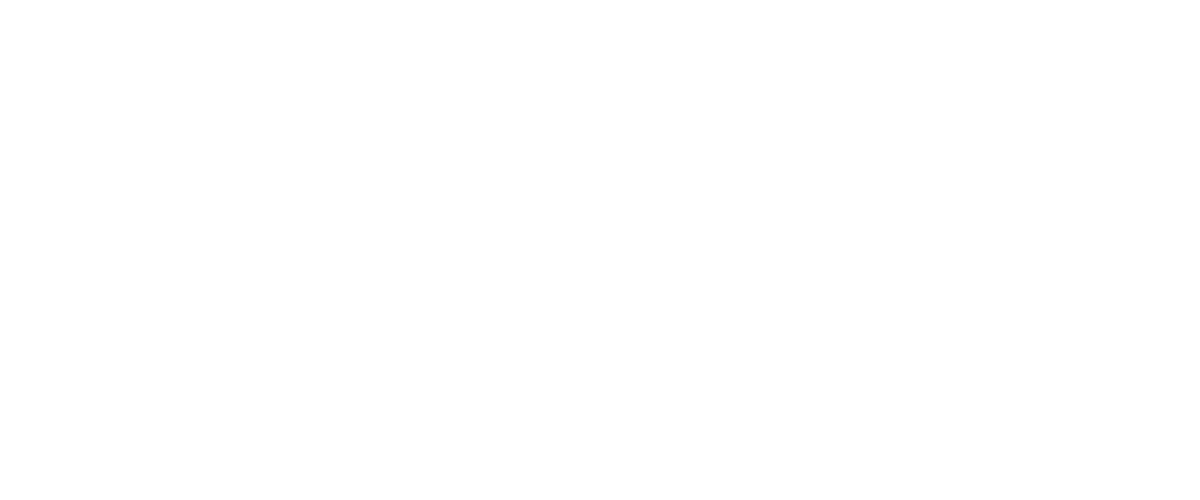

0 days 00:05:34.722000


c:\mcpython3\envs\newscale\lib\site-packages\plotly\matplotlylib\mpltools.py:368: MatplotlibDeprecationWarning:


The is_frame_like function was deprecated in Matplotlib 3.1 and will be removed in 3.3.

c:\mcpython3\envs\newscale\lib\site-packages\plotly\matplotlylib\renderer.py:410: UserWarning:

Bummer! Plotly can currently only draw Line2D objects from matplotlib that are in 'data' coordinates!

c:\mcpython3\envs\newscale\lib\site-packages\plotly\matplotlylib\renderer.py:512: UserWarning:

I found a path object that I don't think is part of a bar chart. Ignoring.



 SN24273: F
Insertion start time: 2020-06-30 15:25:16.163000
Insertion end time: 2020-06-30 15:30:50.885000
Insertion start coords: 
relx    5037.5
rely      1966
relz    4215.5
Name: 2020-06-30 15:25:16.163000, dtype: object
Insertion end coords: 
relx    5037.5
rely    1965.5
relz      5214
Name: 2020-06-30 15:30:50.885000, dtype: object


In [25]:
# Get insertion coords and times for each probe
pcoordsDict = {}
for pSN in serialToProbeDict:
    pid = serialToProbeDict[pSN]
    tempdf = pdf.loc[pdf.serialNum==pSN]
    tempdf['relz'] = 6000 - tempdf['relz']
    
    fig = plt.figure(pSN + ': ' + pid, figsize=[12,5])
    #fig.suptitle(pSN + ': ' + pid)
    ax1 = plt.subplot2grid([1,3], [0,0], colspan=2)
    tempdf.plot(y=['relz', 'relx', 'rely'], ax=ax1)

    start, end = findInsertionStartStop(tempdf)
    ax2 = plt.subplot2grid([1,3],[0,2], colspan=1)
    tempdf.plot(y=['relz', 'relx', 'rely'], ax=ax2)
    ax2.set_xlim([start - pd.Timedelta(minutes=1), end + pd.Timedelta(minutes=1)])
    insertiondf = tempdf.loc[start:end]
    
    for ax, title in zip([ax1,ax2], ['full day ' + pSN + ' ' + pid, 'insertion']):
        ax.set_title(title)
        ax.plot(start, insertiondf.iloc[0, 6], 'bo')
        ax.plot(end, insertiondf.iloc[-1, 6], 'bo')
    
    plotly_fig = tls.mpl_to_plotly(fig)
    savestring = pSN + '_' + pid + '.html'
    plotly_fig.write_html(os.path.join(saveDir, savestring))
    plotly.offline.iplot(plotly_fig, filename=pSN + ': ' + pid)
    
    print(pSN + ': ' + pid)
    print('Insertion start time: ' + str(insertiondf.index[0]))
    print('Insertion end time: ' + str(insertiondf.index[-1]))
    print('Insertion start coords: \n' + str(insertiondf.iloc[0, 4:7]))
    print('Insertion end coords: \n' + str(insertiondf.iloc[-1, 4:7]))
    #print('\n')
    
    pcoordsDict[pid] = {'insertion start coords': list(insertiondf.iloc[0, 4:7].values), 
                        'insertion end coords': list(insertiondf.iloc[-1, 4:7].values), 
                        'insertion start time': str(insertiondf.index[0]), 
                        'insertion end time': str(insertiondf.index[-1])}


In [26]:
pcoordsDict

{'A': {'insertion start coords': [3551.5, 2888.0, 2706.0],
  'insertion end coords': [3551.5, 2887.5, 6000.0],
  'insertion start time': '2020-06-30 15:25:11.984000',
  'insertion end time': '2020-06-30 15:42:31.422000'},
 'B': {'insertion start coords': [4813.5, 2147.0, 3740.5],
  'insertion end coords': [4813.5, 2147.0, 5999.5],
  'insertion start time': '2020-06-30 15:25:12.332000',
  'insertion end time': '2020-06-30 15:36:59.631000'},
 'C': {'insertion start coords': [1774.0, 1937.0, 3526.5],
  'insertion end coords': [1774.5, 1937.0, 5999.5],
  'insertion start time': '2020-06-30 15:25:12.525000',
  'insertion end time': '2020-06-30 15:37:56.267000'},
 'D': {'insertion start coords': [4228.0, 119.0, 3159.0],
  'insertion end coords': [4228.5, 118.5, 5999.5],
  'insertion start time': '2020-06-30 15:25:14.164000',
  'insertion end time': '2020-06-30 15:40:07.282000'},
 'E': {'insertion start coords': [3113.5, 2890.5, 2559.5],
  'insertion end coords': [3113.5, 2890.0, 6000.5],
  '

In [28]:
import json
savefile = os.path.join(saveDir, 'newscale_insertion_coords.json')
with open(savefile, 'w') as outfile:
    json.dump(pcoordsDict, outfile, indent=4)